Sales Trend Hypothesis Test

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("OnlineRetail.csv", encoding="latin1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df = df[["Country", "Quantity", "UnitPrice"]]  
df["Sales"] = df["Quantity"] * df["UnitPrice"]

C:\Users\loalo\AppData\Local\Temp\ipykernel_34920\1138653861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["Quantity"] * df["UnitPrice"]


In [6]:
country1 = "United Kingdom"
country2 = "Germany"

sales_group1 = df[df["Country"] == country1]["Sales"]
sales_group2 = df[df["Country"] == country2]["Sales"]

In [7]:
t_stat, p_value = stats.ttest_ind(sales_group1, sales_group2, equal_var=False, nan_policy='omit')


C:\Users\loalo\AppData\Local\Temp\ipykernel_34920\2045390092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Country"], y=df["Sales"], data=df[df["Country"].isin([country1, country2])], palette="pastel")


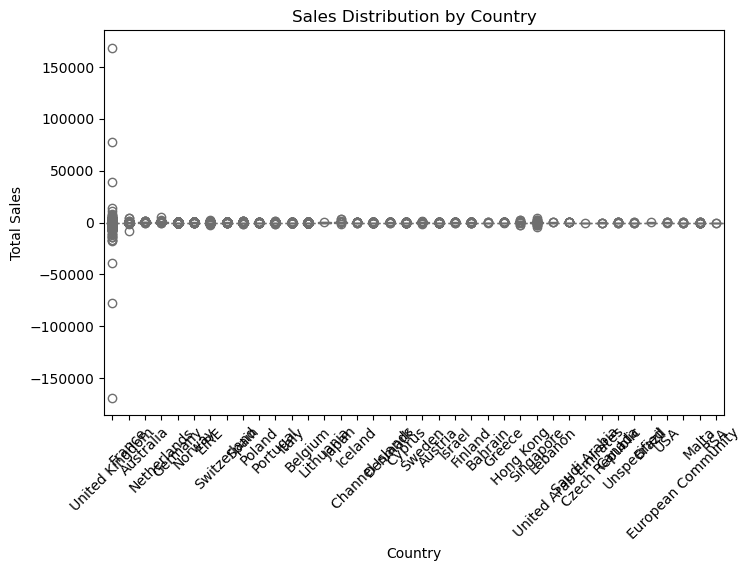

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Country"], y=df["Sales"], data=df[df["Country"].isin([country1, country2])], palette="pastel")
plt.title("Sales Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [9]:
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

T-Statistic: -10.046
P-Value: 0.000


In [10]:
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀: Sales significantly differ between {country1} and {country2}.")
else:
    print(f"Fail to reject H₀: No significant difference in sales between {country1} and {country2}.")


Reject H₀: Sales significantly differ between United Kingdom and Germany.
